In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-cluster -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper functions for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def visualize_mesh(pos, face):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.axes.xaxis.set_ticklabels([])
    ax.axes.yaxis.set_ticklabels([])
    ax.axes.zaxis.set_ticklabels([])
    ax.plot_trisurf(pos[:, 0], pos[:, 1], pos[:, 2], triangles=data.face.t(), antialiased=False)
    plt.show()


def visualize_points(pos, edge_index=None, index=None):
    fig = plt.figure(figsize=(4, 4))
    if edge_index is not None:
        for (src, dst) in edge_index.t().tolist():
             src = pos[src].tolist()
             dst = pos[dst].tolist()
             plt.plot([src[0], dst[0]], [src[1], dst[1]], linewidth=1, color='black')
    if index is None:
        plt.scatter(pos[:, 0], pos[:, 1], s=50, zorder=1000)
    else:
       mask = torch.zeros(pos.size(0), dtype=torch.bool)
       mask[index] = True
       plt.scatter(pos[~mask, 0], pos[~mask, 1], s=50, color='lightgray', zorder=1000)
       plt.scatter(pos[mask, 0], pos[mask, 1], s=50, zorder=1000)
    plt.axis('off')
    plt.show()

2.1.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 57.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 37.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [ ]:
pip install openmesh


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 9.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for openmesh: filename=openmesh-1.2.1-cp310-cp310-linux_x86_64.whl size=855150 sha256=140e85b503ce8d21a63bed2e9c1dbee13daec90824b0a405a40053e97fb8f673
  Stored in directory: /root/.cache/pip/wheels/05/52/ac/4cf307e2dac381ab093a0390901305aee1110ca733ebf55d55
Successfully built openmesh


In [ ]:
pip install tripy


In [ ]:
pip install plyfile

In [ ]:
import os
import torch
import numpy as np
from PIL import Image
from torchvision import transforms
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_points = self.load_off(file_path)

        sample = {'points': mesh_points}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])

        return torch.tensor(vertices, dtype=torch.float32)

# Example usage
root_dir = '/content/drive/MyDrive/PointGNN/GGO_Off/c1'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]
print(sample['points'])


tensor([[ 4.3603e-02, -1.0568e-01],
        [ 4.4119e-02, -1.8279e-01],
        [ 1.0284e-01, -7.8628e-02],
        ...,
        [ 2.1341e-04, -3.7689e-01],
        [ 1.0064e-01, -2.4332e-01],
        [-6.4177e-03, -3.7364e-01]])


In [ ]:
pip install mayavi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 24.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.3/229.3 kB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.9/268.9 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 61.4 MB/s eta 0:00:00
  Using cached vtk-9.3.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (92.0 MB)
  Created wheel for mayavi: filename=mayavi-4.8.1-cp310-cp310-linux_x86_64.whl size=16167218 sha256=2d83facab3d10a48218fb7de555ece26b853d5da78826522f11a6c725c185b28
  Stored in directory: /root/.cache/pip/wheels/c2/6b/23/49aa8ae5063a76fbc35ce90e74f8361cddb9d3a86d5a41ec0a
Successfully bu

In [ ]:
pip install PyQt5


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 22.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.1/338.1 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 MB 8.8 MB/s eta 0:00:00


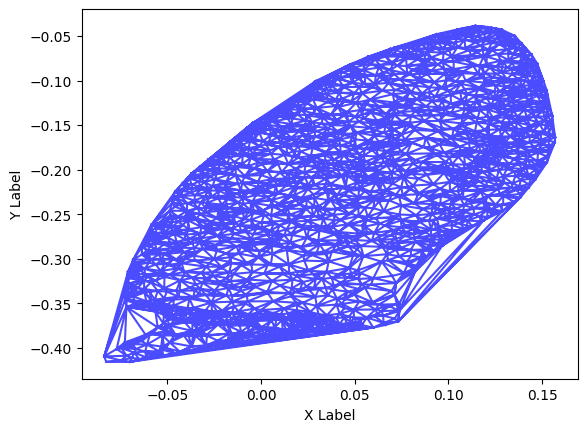

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = os.listdir(root_dir)
        self.file_list = []
        for class_name in self.classes:
            class_dir = os.path.join(root_dir, class_name)
            files = [os.path.join(class_dir, f) for f in os.listdir(class_dir)]
            self.file_list.extend(files)
        self.labels = [i for i in range(len(self.classes)) for _ in range(len(files))]

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = self.file_list[idx]
        label = self.labels[idx]
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face'], 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and visualization
root_dir = '/content/drive/MyDrive/PointGNN/GGO_Off'  # Root directory containing subdirectories for each class
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Visualize 2D mesh using matplotlib
fig, ax = plt.subplots()
ax.triplot(sample['pos'][:, 0], sample['pos'][:, 1], sample['face'], color='blue', alpha=0.7)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()


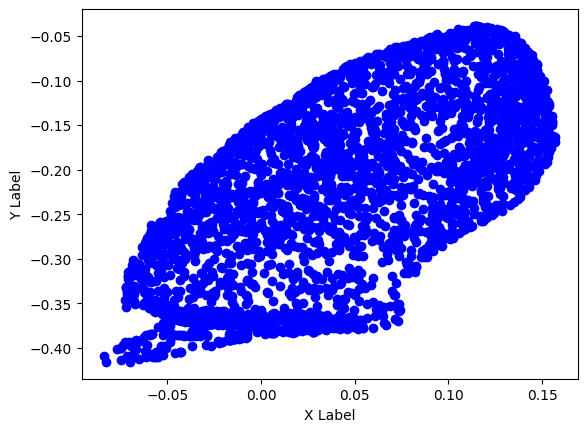

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, class_dirs, transform=None):
        self.class_dirs = class_dirs
        self.transform = transform
        self.file_list = []
        self.labels = []

        for label, class_dir in enumerate(class_dirs):
            files = os.listdir(class_dir)
            self.file_list.extend([os.path.join(class_dir, f) for f in files])
            self.labels.extend([label] * len(files))

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = self.file_list[idx]
        label = self.labels[idx]
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face'], 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and visualization
class_dirs = [
    '/content/drive/MyDrive/PointGNN/GGO_Off/c1',
    '/content/drive/MyDrive/PointGNN/GGO_Off/c2'  # Add more class directories as needed
]

custom_dataset = CustomDataset(class_dirs)

# Accessing a sample
sample = custom_dataset[0]

# Create a 2D scatter plot for the point cloud
fig, ax = plt.subplots()
ax.scatter(sample['pos'][:, 0], sample['pos'][:, 1], c='blue', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')

plt.show()


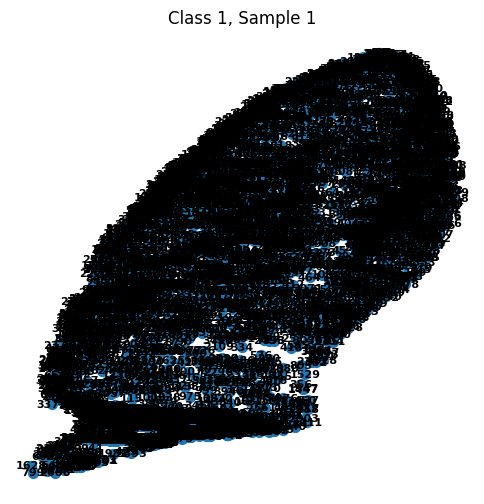

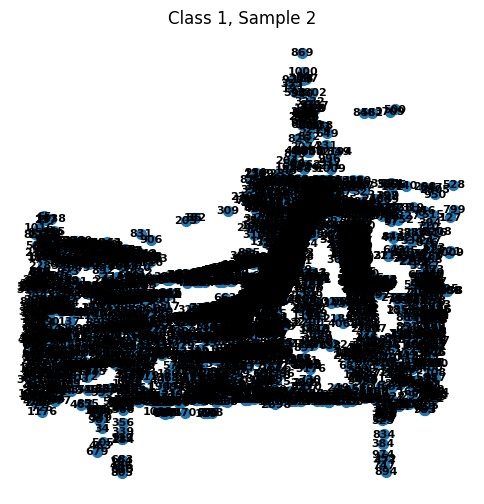

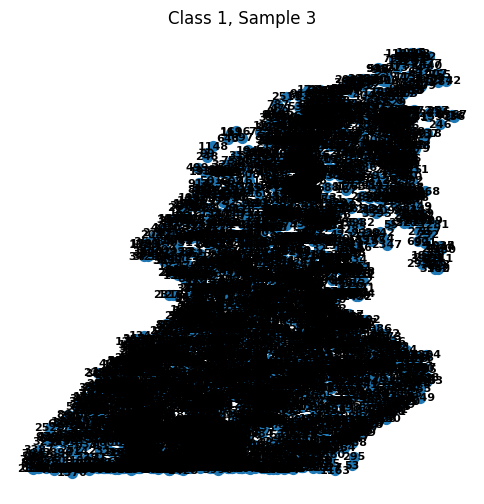

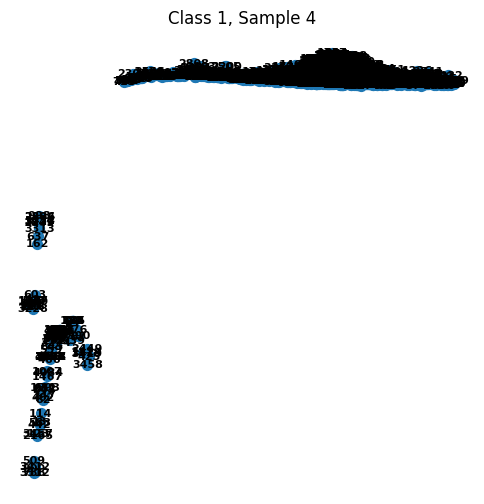

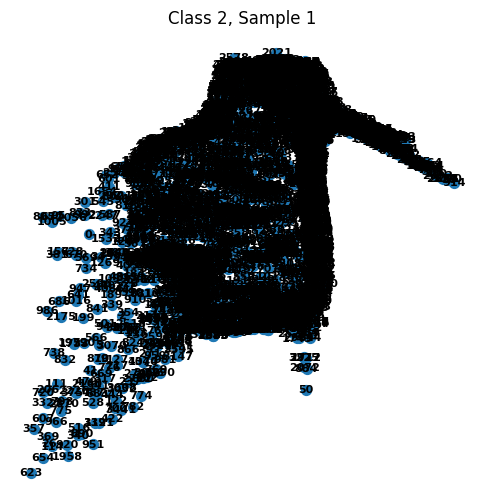

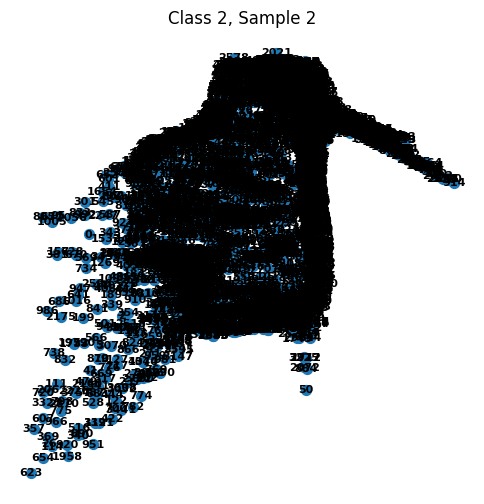

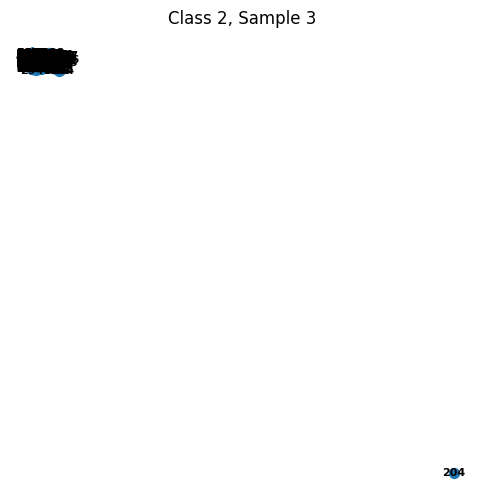

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, class_dirs, transform=None):
        self.class_dirs = class_dirs
        self.transform = transform
        self.file_list = []
        self.labels = []

        for label, class_dir in enumerate(class_dirs):
            files = os.listdir(class_dir)
            self.file_list.extend([os.path.join(class_dir, f) for f in files])
            self.labels.extend([label] * len(files))

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = self.file_list[idx]
        label = self.labels[idx]
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face'], 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation
class_dirs = [
    '/content/drive/MyDrive/PointGNN/GGO_Off/c1',
    '/content/drive/MyDrive/PointGNN/GGO_Off/c2'  # Add more class directories as needed
]

custom_dataset = CustomDataset(class_dirs)

# Create graphs for each class
for i, class_dir in enumerate(class_dirs):
    samples_in_class = [sample for sample in custom_dataset if sample['label'] == i]
    for idx, sample in enumerate(samples_in_class):
        G = nx.Graph()

        # Add nodes to the graph based on 'pos' tensor
        for j, pos in enumerate(sample['pos']):
            G.add_node(j, pos=pos.numpy())

        # Add edges to the graph based on 'face' tensor
        for face in sample['face']:
            for edge in zip(face[:-1], face[1:]):
                G.add_edge(*edge)

        # Visualize the graph
        pos_dict = {j: pos.numpy() for j, pos in enumerate(sample['pos'])}
        plt.figure(figsize=(6, 6))
        plt.title(f"Class {i + 1}, Sample {idx + 1}")
        nx.draw(G, pos=pos_dict, with_labels=True, font_weight='bold', node_size=50, font_size=8)
        plt.show()


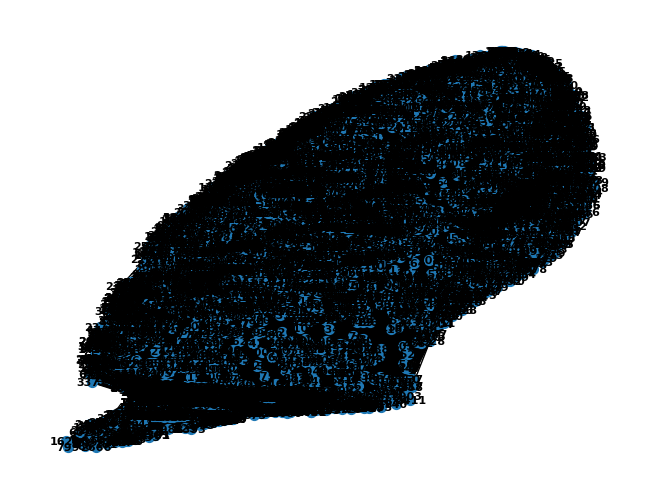

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch.utils.data import Dataset
from torch_cluster import knn_graph
import networkx as nx

class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.file_list = os.listdir(root_dir)

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = os.path.join(self.root_dir, self.file_list[idx])
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face']}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation using knn_graph
root_dir = '/content/drive/MyDrive/PointGNN/GGO_Off/c1'
custom_dataset = CustomDataset(root_dir)

# Accessing a sample
sample = custom_dataset[0]

# Create k-nearest neighbors graph
k = 100  # Set the number of neighbors (adjust as needed)
pos = sample['pos']
edge_index = knn_graph(pos, k, batch=None, loop=False)

# Visualize the graph
G = nx.Graph()
G.add_nodes_from(range(pos.size(0)))

for i, j in edge_index.t().tolist():
    G.add_edge(i, j)

# Draw the graph
pos_dict = {i: pos[i].numpy() for i in range(pos.size(0))}
nx.draw(G, pos=pos_dict, with_labels=True, font_weight='bold', node_size=50, font_size=8)
plt.show()


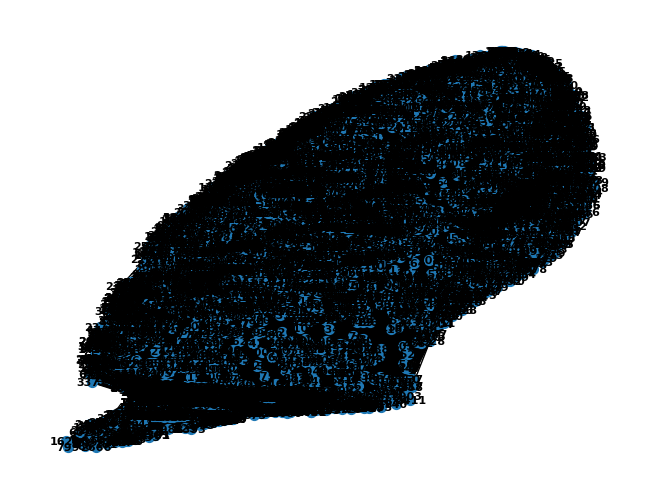

In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch_geometric.transforms as T
from torch.utils.data import Dataset
from torch_cluster import knn_graph
import networkx as nx

class CustomDataset(Dataset):
    def __init__(self, class_dirs, transform=None):
        self.class_dirs = class_dirs
        self.transform = transform
        self.file_list = []
        self.labels = []

        for label, class_dir in enumerate(class_dirs):
            files = os.listdir(class_dir)
            self.file_list.extend([os.path.join(class_dir, f) for f in files])
            self.labels.extend([label] * len(files))

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        file_path = self.file_list[idx]
        label = self.labels[idx]
        mesh_data = self.load_off(file_path)

        sample = {'pos': mesh_data['pos'], 'face': mesh_data['face'], 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample

    def load_off(self, file_path):
        with open(file_path, 'r') as f:
            lines = f.readlines()
            num_vertices = int(lines[1].split()[0])
            vertices = np.array([list(map(float, line.split()[1:])) for line in lines[2:2 + num_vertices]])
            num_faces = int(lines[num_vertices + 2].split()[0])
            faces = np.array([list(map(int, line.split()[1:])) for line in lines[num_vertices + 3:num_vertices + 3 + num_faces]])

        return {'pos': torch.tensor(vertices, dtype=torch.float32),
                'face': torch.tensor(faces, dtype=torch.long)}

# Example usage and graph creation using knn_graph
class_dirs = [
    '/content/drive/MyDrive/PointGNN/GGO_Off/c1',
    '/content/drive/MyDrive/PointGNN/GGO_Off/c2'  # Add more class directories as needed
]
custom_dataset = CustomDataset(class_dirs)

# Accessing a sample
sample = custom_dataset[0]

# Create k-nearest neighbors graph
k = 100  # Set the number of neighbors (adjust as needed)
pos = sample['pos']
edge_index = knn_graph(pos, k, batch=None, loop=False)

# Visualize the graph
G = nx.Graph()
G.add_nodes_from(range(pos.size(0)))

for i, j in edge_index.t().tolist():
    G.add_edge(i, j)

# Draw the graph
pos_dict = {i: pos[i].numpy() for i in range(pos.size(0))}
nx.draw(G, pos=pos_dict, with_labels=True, font_weight='bold', node_size=50, font_size=8)
plt.show()


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool

class GCNClassifier(nn.Module):
    def __init__(self, in_channels, hidden_channels, num_classes):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(in_channels, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = nn.Linear(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x, data.edge_index

        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = F.relu(self.conv3(x, edge_index))

        x = global_mean_pool(x, data.batch)  # Global pooling over all nodes in the graph
        x = F.dropout(x, p=0.5, training=self.training)
        x = self.lin(x)

        return F.log_softmax(x, dim=-1)


In [ ]:
import torch_geometric.data as data
from torch.utils.data import random_split
import torch
import torch_geometric.data as data


class GraphData(data.Data):
    def __init__(self, pos, edge_index, y):
        super(GraphData, self).__init__(pos=pos, edge_index=edge_index, y=y)

    def __inc__(self, key, value):
        if key == 'edge_index':
            return torch.tensor([[self.pos.size(0)], [self.pos.size(0)]], dtype=torch.long)
        else:
            return super(GraphData, self).__inc__(key, value)

# Prepare the dataset
data_list = []
for i in range(len(custom_dataset)):
    sample = custom_dataset[i]
    pos, face, label = sample['pos'], sample['face'], sample['label']
    edge_index = knn_graph(pos, k, batch=None, loop=False)

    data_list.append(GraphData(pos=pos, edge_index=edge_index, y=label))

# Split the dataset into training and test sets
# Split the dataset into training and test sets
train_ratio = 0.8
num_train = int(train_ratio * len(data_list))
num_test = len(data_list) - num_train
train_dataset, test_dataset = random_split(data_list, [num_train, num_test])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)


In [ ]:
from torch_geometric.data import DataLoader
from torch.utils.data import random_split
import torch.optim as optim

# Define device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize model, optimizer, and loss function
model = GCNClassifier(in_channels=3, hidden_channels=64, num_classes=len(class_dirs)).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Training loop
model.train()
for epoch in range(10):  # Train for 10 epochs (adjust as needed)
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item() * data.num_graphs
    print('Epoch {}, Loss: {:.4f}'.format(epoch+1, total_loss / len(train_dataset)))

# Evaluation
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        output = model(data)
        _, predicted = torch.max(output, 1)
        total += data.y.size(0)
        correct += (predicted == data.y).sum().item()

print('Accuracy on test set: {:.2f}%'.format(100 * correct / total))


TypeError: super(type, obj): obj must be an instance or subtype of type

In [ ]:
pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 MB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 61.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 15.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 50.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 52.2 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: ipywidgets
    Found existing installation: ipywidgets 7.7.1
    Uninstalling ipywidgets-7.7.1:
      Successfully uninstalled ipywidgets-7.7.1


In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.data import Data, DataLoader
from torch_geometric.nn import GCNConv
from sklearn.neighbors import NearestNeighbors
import open3d as o3d

# Step 1: Load point cloud data
def load_point_clouds(folder_path):
    point_clouds = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".ply"):
            point_cloud = o3d.io.read_point_cloud(os.path.join(folder_path, file_name))
            points = np.asarray(point_cloud.points)
            point_clouds.append(points)
    return point_clouds

# Step 2: Compute K-nearest neighbors graph
def compute_knn_graph(data, k):
    knn_graphs = []
    for points in data:
        nn = NearestNeighbors(n_neighbors=k, algorithm='auto').fit(points)
        distances, indices = nn.kneighbors(points)
        edge_index = torch.tensor(indices, dtype=torch.long).t().contiguous()
        edge_attr = torch.tensor(distances, dtype=torch.float)
        knn_graphs.append(Data(x=torch.tensor(points, dtype=torch.float), edge_index=edge_index, edge_attr=edge_attr))
    return knn_graphs

# Step 3: Define Graph Neural Network model
class GNNModel(nn.Module):
    def __init__(self):
        super(GNNModel, self).__init__()
        self.conv1 = GCNConv(in_channels=3, out_channels=64)
        self.conv2 = GCNConv(in_channels=64, out_channels=128)
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 2)  # 2 classes

    def forward(self, data):
        x, edge_index, edge_attr = data.x, data.edge_index, data.edge_attr
        x = F.relu(self.conv1(x, edge_index, edge_attr))
        x = F.relu(self.conv2(x, edge_index, edge_attr))
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Step 4: Train and evaluate the GNN model
def train_gnn_model(model, train_loader, optimizer, criterion, epochs):
    model.train()
    for epoch in range(epochs):
        for data in train_loader:
            optimizer.zero_grad()
            output = model(data)
            loss = criterion(output, data.y)
            loss.backward()
            optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item()}")

def evaluate_gnn_model(model, test_loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in test_loader:
            output = model(data)
            _, predicted = torch.max(output, 1)
            total += data.y.size(0)
            correct += (predicted == data.y).sum().item()
    accuracy = 100 * correct / total
    print(f"Test Accuracy: {accuracy}%")

# Load point clouds
class1_data = load_point_clouds("/content/drive/MyDrive/PointGNN/GGO_Raw/C1")
class2_data = load_point_clouds("/content/drive/MyDrive/PointGNN/GGO_Raw/C2")

# Compute KNN graphs
knn_graphs_class1 = compute_knn_graph(class1_data, k=10)  # Adjust k value as needed
knn_graphs_class2 = compute_knn_graph(class2_data, k=10)

# Combine datasets and labels
data_list = knn_graphs_class1 + knn_graphs_class2
labels = [0] * len(knn_graphs_class1) + [1] * len(knn_graphs_class2)
for i in range(len(data_list)):
    data_list[i].y = torch.tensor(labels[i])

# Shuffle and split data into train and test sets
np.random.shuffle(data_list)
train_ratio = 0.8
train_size = int(train_ratio * len(data_list))
train_data, test_data = data_list[:train_size], data_list[train_size:]

# Create data loaders
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Initialize model, optimizer, and criterion
model = GNNModel()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Train and evaluate the model
train_gnn_model(model, train_loader, optimizer, criterion, epochs=10)
evaluate_gnn_model(model, test_loader)


/usr/local/lib/python3.10/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


RuntimeError: Sizes of tensors must match except in dimension 1. Expected size 10 but got size 2 for tensor number 1 in the list.

In [ ]:
!pip install torch torchvision torchaudio
!pip install torch-geometric -f https://data.pyg.org/whl/torch-1.9.0+cuXXX.html


Looking in links: https://data.pyg.org/whl/torch-1.9.0+cuXXX.html


In [ ]:
import os
import torch
import numpy as np
import open3d as o3d
from torch_geometric.data import Data
from sklearn.neighbors import NearestNeighbors

def load_point_clouds(folder):
    point_clouds = []
    for filename in os.listdir(folder):
        if filename.endswith(".ply"):
            filepath = os.path.join(folder, filename)
            point_cloud = o3d.io.read_point_cloud(filepath)
            points = np.asarray(point_cloud.points)
            point_clouds.append(points)
    return point_clouds

def create_graph(points, k=20):
    # Compute K-nearest neighbors
    nn = NearestNeighbors(n_neighbors=k, algorithm='kd_tree')
    nn.fit(points)
    _, indices = nn.kneighbors(points)

    # Convert indices to edge_index format
    src = np.repeat(np.arange(len(points)), k)
    edge_index = np.column_stack((src, indices.reshape(-1)))

    # Convert to torch LongTensor
    edge_index = torch.from_numpy(edge_index).to(torch.long).t().contiguous()

    return edge_index

def create_data_objects(point_clouds, labels, k=20):
    data_list = []
    for points, label in zip(point_clouds, labels):
        edge_index = create_graph(points, k)
        x = torch.from_numpy(points).to(torch.float)
        y = torch.tensor(label, dtype=torch.long)
        data = Data(x=x, edge_index=edge_index, y=y)
        data_list.append(data)
    return data_list

# Define your data directory
data_dir = '/content/drive/MyDrive/PointGNN/GGO_Raw'

# Load point clouds and labels
class_folders = os.listdir(data_dir)
point_clouds = []
labels = []
for i, class_folder in enumerate(class_folders):
    class_path = os.path.join(data_dir, class_folder)
    if os.path.isdir(class_path):
        class_point_clouds = load_point_clouds(class_path)
        point_clouds.extend(class_point_clouds)
        labels.extend([i] * len(class_point_clouds))

# Create PyTorch Geometric Data objects
k = 20  # Adjust the value of k as needed
data_list = create_data_objects(point_clouds, labels, k)

# Example usage of the generated data objects
print("Number of data objects:", len(data_list))
print("Data object example:", data_list[0])


Number of data objects: 7
Data object example: Data(x=[4096, 3], edge_index=[2, 81920], y=0)


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import knn_graph, global_max_pool

class PointNet(nn.Module):
    def __init__(self, num_classes):
        super(PointNet, self).__init__()
        self.conv1 = nn.Conv1d(3, 64, 1)
        self.conv2 = nn.Conv1d(64, 64, 1)
        self.conv3 = nn.Conv1d(64, 64, 1)
        self.conv4 = nn.Conv1d(64, 128, 1)
        self.conv5 = nn.Conv1d(128, 1024, 1)
        self.fc1 = nn.Linear(1024, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = global_max_pool(x, torch.zeros(x.size(0), dtype=torch.long))  # Global max pooling
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)


In [ ]:
import os
import torch
import torch.nn.functional as F
from torch_geometric.data import DataLoader
from torch.optim import Adam
from tqdm import tqdm

# Define your model
class PointNet(torch.nn.Module):
    def __init__(self, num_classes):
        super(PointNet, self).__init__()
        self.conv1 = torch.nn.Conv1d(3, 64, 1)
        self.conv2 = torch.nn.Conv1d(64, 64, 1)
        self.conv3 = torch.nn.Conv1d(64, 64, 1)
        self.conv4 = torch.nn.Conv1d(64, 128, 1)
        self.conv5 = torch.nn.Conv1d(128, 1024, 1)
        self.fc1 = torch.nn.Linear(1024, 512)
        self.fc2 = torch.nn.Linear(512, 256)
        self.fc3 = torch.nn.Linear(256, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = F.relu(self.conv5(x))
        x = torch.max(x, 2, keepdim=True)[0]
        x = x.view(-1, 1024)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x, dim=1)

# Define your dataset class
class YourDataset(torch.utils.data.Dataset):
    def __init__(self, data_dir):
        # Load your dataset from data_dir
        self.data = [...]  # Load your dataset here

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Define your data directory
data_dir = '/content/drive/MyDrive/PointGNN/GGO_Raw/'

# Create your dataset and DataLoader
dataset = YourDataset(data_dir)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

# Define your model, optimizer, and loss function
model = PointNet(num_classes=2)
optimizer = Adam(model.parameters(), lr=0.001)
criterion = torch.nn.NLLLoss()

# Training loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.train()

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for data in tqdm(loader, desc=f'Epoch {epoch + 1}/{num_epochs}', unit='batch'):
        data = data.to(device)
        optimizer.zero_grad()
        output = model(data.x.float())  # Assuming data.x contains point cloud data
        loss = criterion(output, data.y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * data.num_graphs
    epoch_loss = running_loss / len(loader.dataset)
    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {epoch_loss:.4f}')


Epoch 1/10:   0%|          | 0/1 [00:00<?, ?batch/s]


TypeError: DataLoader found invalid type: '<class 'ellipsis'>'

In [ ]:
import os
import open3d as o3d
import numpy as np
from sklearn.neighbors import kneighbors_graph

def create_graph_from_point_clouds(data_dir, k):
    graphs = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for file_name in os.listdir(class_dir):
            if file_name.endswith('.ply'):
                file_path = os.path.join(class_dir, file_name)
                point_cloud = o3d.io.read_point_cloud(file_path)
                points = np.asarray(point_cloud.points)
                graph = kneighbors_graph(points, k, mode='connectivity', include_self=False)
                graphs.append(graph)
                labels.append(class_name)

    return np.array(graphs), np.array(labels)

data_dir = '/content/drive/MyDrive/PointGNN/GGO_Raw'
k = 10  # Adjust k as needed
graphs, labels = create_graph_from_point_clouds(data_dir, k)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

class GraphNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(GraphNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Convert labels to numeric representation
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(graphs, encoded_labels, test_size=0.2, random_state=42)

# Define model parameters
input_dim = X_train.shape[-1]  # Dimensionality of graph
hidden_dim = 64
output_dim = len(label_encoder.classes_)

# Initialize model
model = GraphNN(input_dim, hidden_dim, output_dim)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


NameError: name 'labels' is not defined

In [ ]:

X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

model.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.LongTensor(y_test)
    outputs = model(X_test_tensor)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_test_tensor).sum().item() / y_test_tensor.size(0)
    print(f'Test Accuracy: {accuracy:.4f}')


TypeError: can't convert np.ndarray of type numpy.object_. The only supported types are: float64, float32, float16, complex64, complex128, int64, int32, int16, int8, uint8, and bool.

In [ ]:
import os
import open3d as o3d
import numpy as np
from sklearn.neighbors import kneighbors_graph
from scipy.sparse import csr_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

class GraphNN(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(GraphNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return self.sigmoid(x)

def create_graph_from_point_clouds(data_dir, k):
    graphs = []
    labels = []

    for class_name in os.listdir(data_dir):
        class_dir = os.path.join(data_dir, class_name)
        if not os.path.isdir(class_dir):
            continue

        for file_name in os.listdir(class_dir):
            if file_name.endswith('.ply'):
                file_path = os.path.join(class_dir, file_name)
                point_cloud = o3d.io.read_point_cloud(file_path)
                points = np.asarray(point_cloud.points)
                graph = kneighbors_graph(points, k, mode='connectivity', include_self=False)
                graphs.append(csr_matrix.toarray(graph))  # Convert sparse matrix to dense array
                labels.append(class_name)

    return np.array(graphs), np.array(labels)






In [ ]:
data_dir = '/content/drive/MyDrive/GraphPointNet/pointclouds'
k = 10  # Adjust k as needed
graphs, labels = create_graph_from_point_clouds(data_dir, k)


label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

one_hot_encoder = OneHotEncoder(sparse=False)
y_onehot = one_hot_encoder.fit_transform(encoded_labels.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(graphs, y_onehot, test_size=0.2, random_state=42)


X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)

# Initialize model
input_dim = X_train.shape[1]  # Dimensionality of graph
hidden_dim = 32
model = GraphNN(input_dim, hidden_dim)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


In [ ]:
model.eval()
with torch.no_grad():
    X_test_tensor = torch.FloatTensor(X_test)
    y_test_tensor = torch.FloatTensor(y_test)
    outputs = model(X_test_tensor)
    predicted = torch.round(outputs)
    correct = (predicted == y_test_tensor).sum().item()
    total = y_test_tensor.size(0)
    accuracy = correct / total
    print(f'Test Accuracy: {accuracy:.4f}')

In [ ]:
pip install plyfile


Shape of point cloud: (675840, 3)


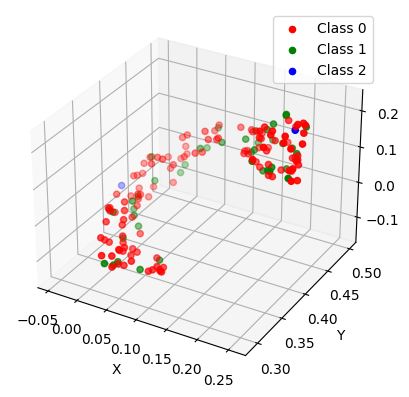

KNN Graph:


In [ ]:
import os
import numpy as np
from sklearn.neighbors import kneighbors_graph
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from plyfile import PlyData

def read_point_clouds(root_folder, class_folders):
    point_clouds = []
    labels = []
    for i, class_folder in enumerate(class_folders):
        class_path = os.path.join(root_folder, class_folder)
        for file_name in os.listdir(class_path):
            if file_name.endswith('.ply'):  # Assuming your point clouds are stored as PLY files
                file_path = os.path.join(class_path, file_name)
                try:
                    ply_data = PlyData.read(file_path)
                    points = np.vstack([ply_data['vertex']['x'], ply_data['vertex']['y'], ply_data['vertex']['z']]).T
                    point_clouds.append(points)
                    labels.append(i)  # Assign label based on the class folder index
                except Exception as e:
                    print(f"Error loading file {file_path}: {e}")
    if not point_clouds:
        raise ValueError("No point clouds found in the specified folders.")
    return np.vstack(point_clouds), np.array(labels)

def visualize_3d_point_cloud(point_cloud, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    colors = ['r', 'g', 'b']  # Assigning colors for each class
    for label in np.unique(labels):
        indices = np.where(labels == label)
        ax.scatter(point_cloud[indices, 0], point_cloud[indices, 1], point_cloud[indices, 2], c=colors[label], label=f'Class {label}')
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.legend()
    plt.show()

def knn_graph(point_cloud, k):
    A = kneighbors_graph(point_cloud, k, mode='connectivity', include_self=False)
    return A

# Define your root folder and class folders
root_folder = '/content/drive/MyDrive/GraphPointNet/pointclouds'
class_folders = ['c2', 'c3', 'c4']

# Read point clouds and corresponding labels
try:
    point_cloud, labels = read_point_clouds(root_folder, class_folders)
except ValueError as ve:
    print(ve)
    exit(1)

# Debug print to ensure that point_cloud is defined
print(f"Shape of point cloud: {point_cloud.shape}")

# Visualize the point cloud
visualize_3d_point_cloud(point_cloud, labels)

# Create KNN graph
k = 10  # Choose the number of nearest neighbors
A = knn_graph(point_cloud, k)

print("KNN Graph:")
print(A.toarray())  # Print the adjacency matrix of the KNN graph
